# Optimizing loss with Gradient Descent 
This task is to understand optimizing loss function with gradient descent method.
We will see that gradient descent method can not find optimal solution when loss function is non covex function. Different inital weights can reaches not only global minimum but also local minimum.

## 1. implement loss function and gradient
lets defined loss function as $\mathcal J_{\vec w}=w_0^2 + w_1^2 + 20 \sin(w_0) \cos(w_1)$.

In [ ]:
import numpy as np

In [ ]:
# forward
def loss(w):
    return w[0]**2 + w[1]**2 + 20*np.sin(w[0])*np.cos(w[1])

In [ ]:
# backward
def gradient(w):
    
    #initialize
    grad = np.ndarray(2, dtype = 'float')
    
    grad[0] = 2*w[0] + 20*np.cos(w[0])*np.cos(w[1]) # dJ/dw0
    grad[1] = 2*w[1] - 20*np.sin(w[0])*np.sin(w[1]) # dJ/dw1
    
    return grad

### Test 
Test the two functions defined in the task above with $\vec w = (0,0)^T$ 

In [ ]:
w = np.zeros(2)

# analytically compute the expected values
expected_loss = 0
expected_gradient = np.array([20,0])

# test loss function
assert abs(loss(w) - expected_loss) < 1e-8
assert np.all(np.abs(gradient(w) - expected_gradient) < 1e-8)

## 2. implement function to update W with Gradient decent method

$\vec{w}$ needs to be optimized (minimizing the loss) by iterative gradient descent method

choose proper stoping creteria is a key
- fixed number of iterations
- change in loss 
- gradient close to zero

In [ ]:
def gradient_descent(w, eta=0.01):
    w_star = np.copy(w)
    max_iter = 1000
    epsilon = 1e-6
    
    for iter in range(max_iter):
        # compute gradient at current w
        g = gradient(w_star)
        
        # update w with negative step
        w_star -= eta*g
        
        # check stoping criterion (if gradient is close to 0)
        if np.linalg.norm(g) < epsilon:
            break
    else:
        print("the minima wasn't found with W_intial : ", w)
    
    return w_star

## 3. Find global minima
We call gradient descent 1000 times with different random values for $\vec w\in[-10,10]^2$. Since W is float, we need to aggregate them by rounding (otherwise, we will have 1000 different w). 

In [ ]:
weights = []

for i in range(1000):
    # 1. create random weight vector
    w = np.random.uniform(-10,10,2)
    # 2. call gradient descent
    w_star = gradient_descent(w)
    # 3. store it in the list
    weights.append(w_star)

print(len(weights))

1000


In [ ]:
weights = np.array(weights)

agg_weights = np.unique(np.round(weights,4),axis=0)

print(len(agg_weights))

16


In [ ]:
losses = [loss(w) for w in agg_weights ]
idx_sorted = np.argsort(losses)

for i in idx_sorted:
  print("the loss is ", round(losses[i],4), "at minima", agg_weights[i])

the loss is  -17.7573 at minima [-1.4276 -0.    ]
the loss is  -8.7995 at minima [ 1.4218 -2.8493]
the loss is  -8.7995 at minima [1.4218 2.8493]
the loss is  0.1583 at minima [ 4.2711 -0.    ]
the loss is  9.0327 at minima [-4.2482 -2.8207]
the loss is  9.0327 at minima [-4.2482  2.8207]
the loss is  17.9905 at minima [-1.3989 -5.67  ]
the loss is  17.9905 at minima [-1.3989  5.67  ]
the loss is  35.448 at minima [ 4.1257 -5.5532]
the loss is  35.448 at minima [4.1257 5.5532]
the loss is  35.8227 at minima [-7.0689 -0.    ]
the loss is  44.4057 at minima [ 6.975  -2.7039]
the loss is  44.4057 at minima [6.975  2.7039]
the loss is  62.238 at minima [ 1.305  -8.3739]
the loss is  62.238 at minima [1.305  8.3739]
the loss is  88.6532 at minima [ 9.6789 -0.    ]


## Visualization 
Plot the loss surface and the optimized points into the same 3D plot.

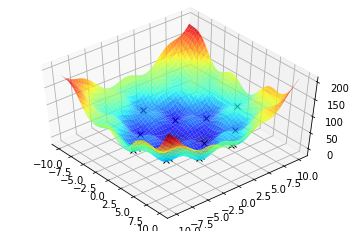

In [ ]:
from matplotlib import pyplot

# 1. create 3D axis
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d', azim = -40, elev=50)

# 2. define range to plot
r = np.linspace(-10, 10, 200)
w0, w1 = np.meshgrid(r,r)

# 3. compute loss for w0 and w1
J = loss([w0,w1])

# 4. plot surface with jet colormap
axis.plot_surface(w0, w1, J, cmap="jet", alpha=0.8)

# 5. plot resulting points in 3D
for w_star in agg_weights:
  # compute the z-position)
  z = loss(w_star)
  # plot as 3D point
  axis.plot([w_star[0]], [w_star[1]], [z], "kx-")